# Machine Learning Model:

## 1. Import Required Libraries

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc,
    classification_report, confusion_matrix
)
import joblib
import os

## 2. Load and Prepare the Data

In [7]:
# Assuming preprocessed dataset contains these features:

df = pd.read_csv("processed_spacex_data.csv")

# Define features (X) and target (y)
features = ['rocket_encoded', 'launchpad_encoded', 'temperature', 'humidity',
            'wind_speed', 'year', 'month', 'day', 'hour']
target = 'success'


# Drop rows with missing feature values
df = df.dropna(subset=features + [target])

X = df[features]
y = df[target]

## 3. Train-Test Split and Scaling

In [8]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

## 4. Define and Train Models

**Logistic Regression**

In [10]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

print("Logistic Regression Classification Report:\n")
print(classification_report(y_test, y_pred_log))

Logistic Regression Classification Report:

              precision    recall  f1-score   support

       False       0.00      0.00      0.00         2
        True       0.96      1.00      0.98        54

    accuracy                           0.96        56
   macro avg       0.48      0.50      0.49        56
weighted avg       0.93      0.96      0.95        56



d:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Decision Tree Classifier (with GridSearchCV)**

In [11]:
param_grid_dt = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

dt = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='f1')
grid_dt.fit(X_train, y_train)

y_pred_dt = grid_dt.predict(X_test)

print("Decision Tree Classification Report:\n")
print(classification_report(y_test, y_pred_dt))


d:\Python311\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Decision Tree Classification Report:

              precision    recall  f1-score   support

       False       0.33      0.50      0.40         2
        True       0.98      0.96      0.97        54

    accuracy                           0.95        56
   macro avg       0.66      0.73      0.69        56
weighted avg       0.96      0.95      0.95        56



**Random Forest Classifier**

In [13]:
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1')
grid_rf.fit(X_train, y_train)

y_pred_rf = grid_rf.predict(X_test)

print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

# Save best model
joblib.dump(grid_rf.best_estimator_, "launch_success.pkl")


d:\Python311\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Random Forest Classification Report:

              precision    recall  f1-score   support

       False       0.50      0.50      0.50         2
        True       0.98      0.98      0.98        54

    accuracy                           0.96        56
   macro avg       0.74      0.74      0.74        56
weighted avg       0.96      0.96      0.96        56



['launch_success.pkl']

**ROC Curve & AUC**

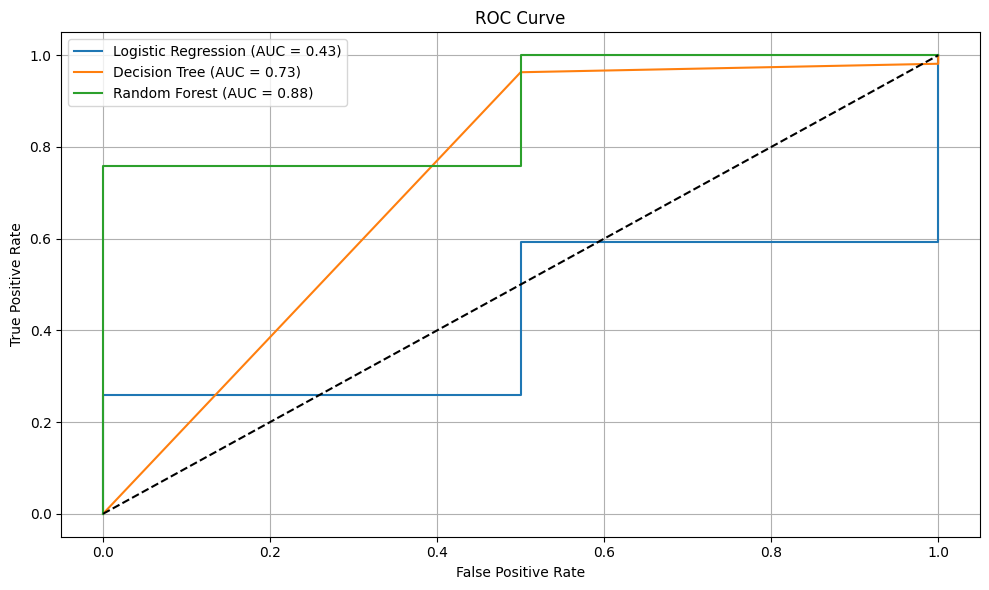

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

models = {
    "Logistic Regression": (logreg, y_pred_log),
    "Decision Tree": (grid_dt.best_estimator_, y_pred_dt),
    "Random Forest": (grid_rf.best_estimator_, y_pred_rf)
}

plt.figure(figsize=(10, 6))
for name, (model, _) in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc(fpr, tpr):.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("roc_curve.png")
plt.show()

**Feature Importance**

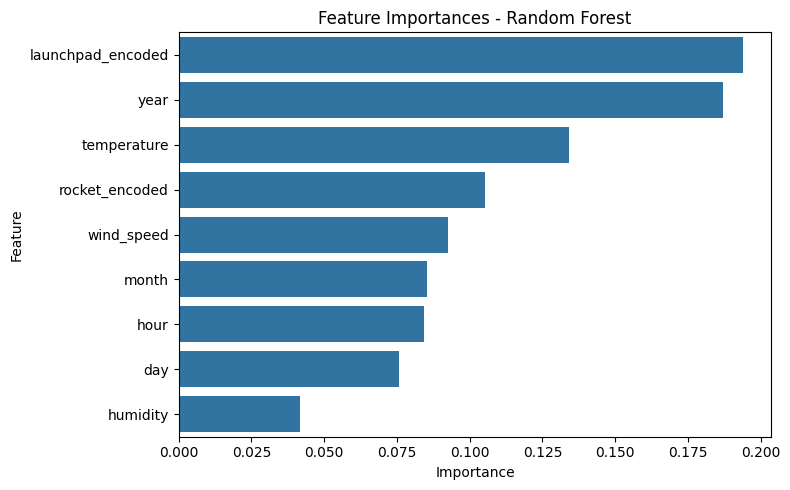

In [22]:
import seaborn as sns
importances = grid_rf.best_estimator_.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title("Feature Importances - Random Forest")
plt.tight_layout()
plt.savefig("feature_importance.png")
plt.show()
